In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

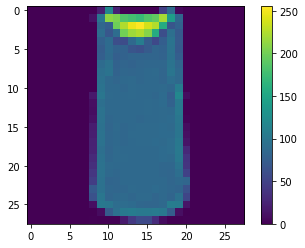

In [8]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

### Tiền xử lý dữ liệu: Chia tỷ lệ các giá trị này thành các giá trị trong phạm vi từ 0 đến 1 trước khi đưa chúng vào mô hình mạng neural. Để làm như vậy, chia các giá trị cho 255. Training set và testing set phải được tiền xử lý theo cùng 1 cách.

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

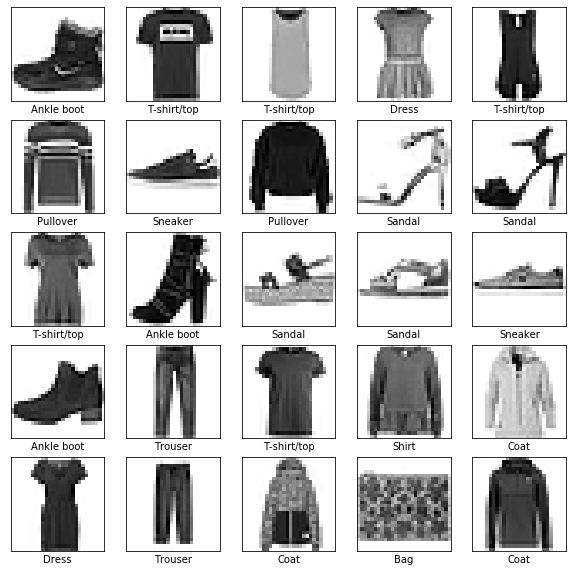

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Buid Model:
Cấu trúc trong của các mạng neural là các layer:
    - Layer đầu tiên trong mạng là keras.layers.Flatten: Lớp này chỉ có tác dụng chuyển đổi định dạng của hình ảnh từ mảng hai chiều (28 x 28 pixel) thành mảng một chiều (28 * 28 = 784 pixel).
    - Sau khi dùng lớp Flatten để làm phẳng dữ liệu, mạng bao gồm 2 lớp keras.layers.Dense. Đây là 1 lớp kết nối đủ, nghĩa là mỗi 1 node dữ liệu đều được nối với tất cả các node của lớp phía trước. 
        + Lớp Dense đầu tiên bao gồm 128 node(nơ-ron). Hàm kích hoạt activation là 'relu'
        + Lớp Dense thứ 2 bao gồm 10 node(nơ-ron). Hàm kích hoạt activation là 'softmax'


In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
### Trước khi training, model cần thêm một vài cài đặt. Những cài đặt đó được thêm vào trong bước compile model:
* #### Loss function: Giá trị này đo lường mức độ chính xác của model trong quá trình training. Chúng ta cần giảm thiểu giá trị này để "điều khiển" mô hình đi đúng hướng.
* #### Optimizer: Cách mà mô hình cập nhật dựa trên dữ liệu và loss function 
* #### Metrics: Sử dụng để theo dõi quá trình training và testing. Ví dụ là 'accuracy' để xác định tỉ lệ những hình ảnh được phân loại chính xác trên tổng số.  

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training model :
* #### Feed(cung cấp) dữ liệu cho quá trình training. Trong ví dụ này là mảng 'train_images' và 'train_labels'. 
* #### Mô hình sẽ học cách kết hợp giữa images và labels.
* #### Kiểm chứng mô hình đối với testing set. 

In [13]:
model.fit(train_images, train_labels, epochs=10) #Training model

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4952 - accuracy: 0.8262
Epoch 2/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3732 - accuracy: 0.8662
Epoch 3/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3347 - accuracy: 0.8750
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3122 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2937 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2776 - accuracy: 0.8972
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2644 - accuracy: 0.9031
Epoch 8/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.2537 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.2441 - accuracy: 0.9090
Epoch 10/10

In [14]:
# model with testing set. Check loss - accuracy 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

10000/1 - 1s - loss: 0.2279 - accuracy: 0.8803

Test accuracy: 0.8803

Test loss: 0.34044717655181883


##### Hiện tượng overfiting xảy ra khi test accuracy thấp hơn quá nhiều so với train accuracy. Điều này có nghĩa là mô hình không có kết quả tốt đối với những dữ liệu mới mô hình chưa từng thấy. Chỉ cho kết quả tốt với những dữ liệu đã được huấn luyện. 

# Make predictions: 


In [15]:
# Với mô hình đã được train, có thể đưa ra dự đoán đối với một số hình ảnh. 
predictions = model.predict(test_images) # đưa ra dự đoán đối với các hình ảnh trong tập test_images.


In [16]:
predictions[1]

array([9.7651161e-07, 7.6278648e-13, 9.9871719e-01, 2.2704226e-10,
       1.1042168e-03, 7.1019518e-14, 1.7765301e-04, 3.1083494e-16,
       3.7984421e-11, 2.7602335e-20], dtype=float32)

#### Mỗi một dự đoán là 1 mảng gồm 10 phần tử. Các phần tử đại diện cho độ chính xác của model đối với từng mặt hàng được phân loại. Chúng ta có thể thấy được nhãn nào có độ tin cậy cao nhất. 

In [17]:
class_names[np.argmax(predictions[1])]


'Pullover'

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

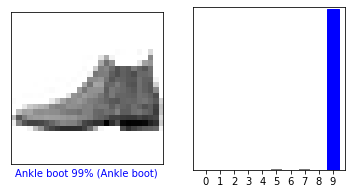

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

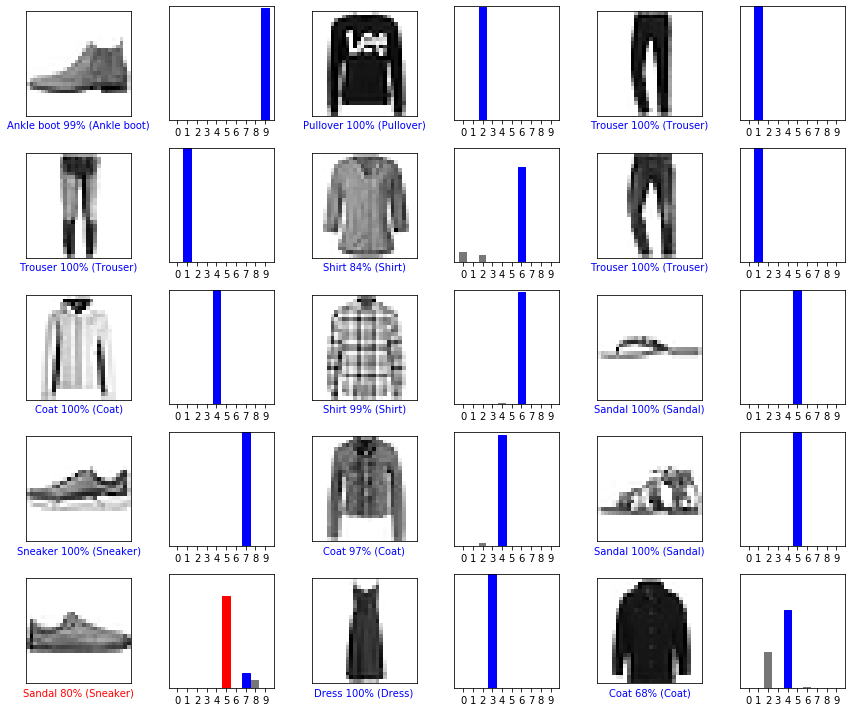

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()